In [1]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import scienceplots

In [2]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

In [3]:
plt.style.use(['science', 'notebook', 'grid'])

files = ["run2_bias_34V4_led_275nm_20ns_4V7/sphe.txt", "run3_bias_34V7_led_275nm_20ns_4V7/sphe.txt", "run4_bias_35V2_led_275nm_20ns_4V7/sphe.txt", "run5_bias_35V7_led_275nm_20ns_4V7/sphe.txt", "run6_bias_36V2_led_275nm_20ns_4V7/sphe.txt", "run7_bias_36V7_led_275nm_20ns_4V7/sphe.txt", "run0_bias_37V_led_275nm_20ns_4V7/sphe.txt"]

bias = np.array([34.4, 34.7, 35.2, 35.7, 36.2, 36.7, 37.0])
sphes = np.zeros(len(bias))
ersphes = np.zeros(len(bias))

In [4]:
for i, file in enumerate(files):
    with open(file, "r") as f:
        last_line = f.readlines()[-1]

    last_line = last_line.split(" ")
    sphes[i] = float(last_line[2])
    ersphes[i] = math.sqrt(sphes[i])

chisq = 1.108737943258015/7
Break down voltage = 32.03828622331931 +/- 0.9678621026701835


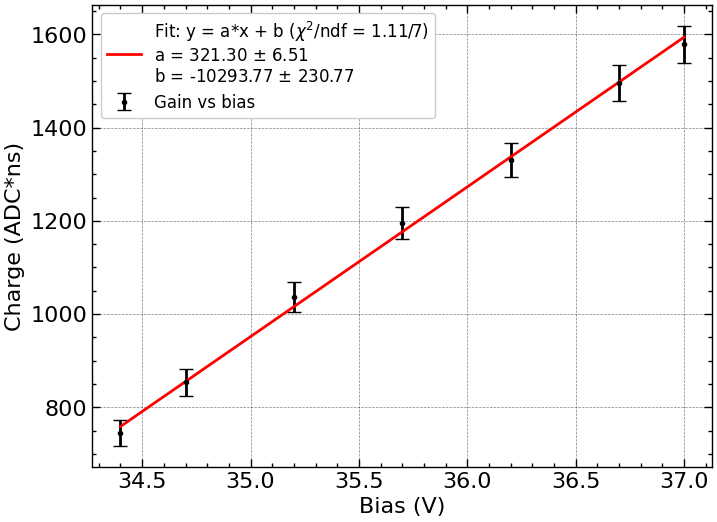

In [7]:
fig, ax = plt.subplots()


a_fit, cov = curve_fit(linearFunc, bias, sphes, sigma=ersphes)
inter = a_fit[0]
slope = a_fit[1]
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])
yfit = inter + slope*bias

val_fit = linearFunc(bias,*a_fit)
diff = sphes - val_fit
chi2 =  np.sum((diff/ersphes)**2)
df = len(sphes)
print(f"chisq = {chi2}/{df}")

ax.errorbar(bias,sphes,yerr=ersphes,fmt='.k', label=f'Gain vs bias', capsize=5)

plt.plot(bias,yfit, label=f'Fit: y = a*x + b ($\chi^2$/ndf = {chi2:.2f}/{df})\na = {slope:.2f} $\pm$ {d_slope:.2f}\nb = {inter:.2f} $\pm$ {d_inter:.2f}', color="red")
plt.legend(loc=2, fontsize=12)

plt.xlabel("Bias (V)")
plt.ylabel("Charge (ADC*ns)")


bdv = -inter/slope
erbdv = bdv*math.sqrt((d_inter/inter)**2 + (d_slope/slope)**2)

print(f"Break down voltage = {bdv} +/- {erbdv}")



plt.savefig("graphs/DCemVD_gain.png")
plt.show()